### 1. 자연어 처리 (NLP)
    1.1. 한국어 형태소분석기 konlpy와 mecab설치
    1.2. Mecab 사용자 사전 추가하기
    1.3. 한국어 자연어 처리 수행
 
 
### 2. 핵심어 분석  
    2.1. 핵심어 단순빈도 분석
    2.2. 단어 구름
    2.3. 단어빈도-역문서빈도(TF-IDF) 분석

# 1. 자연어 처리 (NLP)


## 1-1. 형태소 분석기 mecab 설치하기(window 버전)

### 4) jupyter notebook에서 다운받은 mecab 사용하기

1. mecab_python-0.996_ko_0.9.2_msvc-cp37-cp37m-win_amd64.whl'를 site-package 폴더에 옮긴다.

In [8]:
# 아래 명령어를 사용하여서 site-package 위치를 확인
import site; site.getsitepackages() 

['C:\\Users\\realy\\anaconda3\\envs\\py37',
 'C:\\Users\\realy\\anaconda3\\envs\\py37\\lib\\site-packages']

성공적으로 설치 되었다면 (전체적으로 커널 리셋하고 다시 실행해주기) 

In [9]:
from konlpy.tag import Mecab
mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
mecab.pos('형태소 분석기가 제대로 설치 되었습니다.')

[('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('가', 'JKS'),
 ('제대로', 'MAG'),
 ('설치', 'NNG'),
 ('되', 'XSV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [10]:
mecab.pos('올리브영')

[('올리브영', 'NNP')]

In [11]:
# 종성 여부 판단 

def has_coda(word):
    return (ord(word[-1]) -44032) % 28 == 0

has_coda('올리브영')

False

## 1-2. MeCab 사용자 사전 추가하기


- 사용자 사전을 추가하는 이유 

예를 들면 '올리브영'을 형태소 분석기에 넣으면 '올리브(NNG)','영(NNG)'으로 분석되어 나옵니다.  
이것을 '올리브영(NNP)'로 분석되도록 사용자 자체로 사전을 추가할 수 있습니다.  

- mecab의 폴더를 보면 크게 3개의 폴더로 이뤄져 있습니다.

1. mecab-ko-dic : mecab의 단어 사전
2. tools : 단어 사전에 단어를 추가시킨 후 컴파일 및 적용을 시켜주는 프로그램들 존재
3. user-dic : 사용자가 추가적으로 추가한 단어에 대한 단어 사전

단어 사전에 단어를 추가하는 프로세스는 크게 다음과 같이 진행이 됩니다.

1. user-dic의 csv 파일에 형식에 맞게 추가하고 싶은 단어를 추가
2. tools의 add-userdic-win.ps1라는 프로그램을 실행하여 컴파일 진행하여 추가 사항을 적용
3. 2번의 과정에 의해서 user-dic에서 설정한 csv파일이 mecab-ko-dic에 새로 csv파일이 만들어져서 단어 사전에 해당 단어가 적용됨

우선 user-dic에서 nnp.csvv 파일을 확인합니다. 

In [12]:
with open("C:/mecab/user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,,,,NNP,*,T,SK매직,*,*,*,*,*\n',
 '청소기,,,,NNP,*,F,청소기,*,*,*,*,*\n',
 '\n',
 'SK매직,,,,NNP,*,F,SK매직,*,*,*,*,*\n']

기본적으로 '대우'라는 단어와 '구글'이라는 단어에 대해서 단어가 있습니다.  

이제 각자 원하는 단어를 추가해주세요. (예시: '올리브영')  

,과 *의 형태는 변경하면 안됩니다. 그리고 T와 F는 종성의 여부 입니다. 

In [13]:
file_data.append('SK매직,,,,NNP,*,F,SK매직,*,*,*,*,*\n') ## 원하는 단어 추가 
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
        
f.close()

file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,,,,NNP,*,T,SK매직,*,*,*,*,*\n',
 '청소기,,,,NNP,*,F,청소기,*,*,*,*,*\n',
 '\n',
 'SK매직,,,,NNP,*,F,SK매직,*,*,*,*,*\n',
 'SK매직,,,,NNP,*,F,SK매직,*,*,*,*,*\n']

In [14]:
with open("C:/mecab/mecab-ko-dic/user-nnp2.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,2915,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,1786,3546,0,NNP,*,T,SK매직,*,*,*,*,*\n',
 '청소기,1786,3545,1,NNP,*,F,청소기,*,*,*,*,*\n']

추가로 단어의 우선순위가 낮아서 인식이 잘 안되는 경우가 있어서 우선순위 수정 하는 과정이 필요합니다.

In [15]:
file_data[2]='아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n'

with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
    
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'SK매직,1786,3546,0,NNP,*,T,SK매직,*,*,*,*,*\n',
 '청소기,1786,3545,1,NNP,*,F,청소기,*,*,*,*,*\n']

우선순위를 0으로 바꿔주었고 windows powerShell에서 앞서 다운한 compile-win.ps1을 실행시킵니다.  

**.\tools\compile-win.ps1**


In [16]:
# 완료가 되면 이렇게 확인 가능합니다. 

from konlpy.tag import Mecab

mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
mecab.pos('청소기')

[('청소기', 'NNG')]

In [17]:
# 완료가 되면 이렇게 확인 가능합니다. 

from konlpy.tag import Mecab

mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
mecab.pos("SK매직")

[('SK', 'SL'), ('매직', 'NNG')]

## 1-3. 한국어 자연어 처리

#### 1) 텍스트 수집한 데이터 파일 불러오기



In [18]:
# 필요한 데이터 처리를 위해 필요한 라이브러리를 탑재(import) 한다.

import re
import json
import pandas as pd
import xlsxwriter
import numpy as np

In [19]:
blog_df = pd.read_csv('data/skm_blog.csv', encoding='utf-8-sig') # 네이버 블로그 csv파일 불러오기

In [20]:
blog_df = blog_df.sort_values(by='Post Date' ,ascending=True) # post Date를 기준으로 오름차순으로 정렬
blog_df['Post Date'] = [str(dates).replace('.0','') for dates in blog_df['Post Date']] # 분석을 위해서 날짜의 형식을 변경함. 

In [21]:
blog_df.head()

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
292,"[차트뉴스] SK매직, 식기세척기 시장 만년 1위",https://blog.naver.com/danawaelec?Redirect=Log...,"오죽하면 빨래건조기, 로봇 청소기와 함께 신의 물건인 ‘가전 3신기’로 꼽히겠는가....",다나와 쇼핑톡 - 비교하고 잘사자!,https://blog.naver.com/danawaelec,20161202,\n\n어쩌면 지금이야말로 그 어느 때보다 이불 밖은 위험한 시기다. 매서운 추위에...
521,동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...,https://blog.naver.com/xmsxmsdl89?Redirect=Log...,동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 렌탈해서 사용하고 있어요. 안...,튼튼이/개똥이 행복!!!,https://blog.naver.com/xmsxmsdl89,20161208,\n\n \n \n \n \n동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 ...
96,SK매직 무선청소기 VCL-D200 개봉기 및 사용기,https://blog.naver.com/rock115?Redirect=Log&lo...,"SK매직 무선청소기 VCL-D200 지금까지 유선청소기만 써 오다, 첫 무선청소기 ...",초코주의 창의적인 즐거움,https://blog.naver.com/rock115,20161220,\n\n\n\n\n\n\n\n\n제품을 리뷰 \n\n\n\n\n\n\n\n\n\n\...
534,내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613,https://blog.naver.com/sejungrha?Redirect=Log&...,아기가 생긴 뒤로 내 머리카락 치우기에 여념이 없다가 세컨청소기를 사야겠다 마음먹고...,"블리, 블리 주니어와 함께하는 일상♥",https://blog.naver.com/sejungrha,20161223,\n\n\n\n\n\n\n\n\n상품평: 생활\n\n\n\n\n\n\n\n\n\n\...
274,소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD,https://blog.naver.com/vision1301?Redirect=Log...,"다른 청소기를 사용안해봐서 비교는 어렵지만, 먼지 잘 빨리고 핸드링도 좋아요 ㅋㅋㅋ...",100님의 블로그,https://blog.naver.com/vision1301,20170121,\n\n \n​\n소형가전은 인터넷으로 구매하고 있어요\n \n청소기는 집이 좁은관...


In [22]:
# 문서에 'Post Date'에서 빈칸을 nan (빈데이터)를 찾아주고 삭제해주는 과정 = 나중에 분석에 오류를 없애기 위해서
drop_index = blog_df['Post Date'][blog_df['Post Date']=='nan'].index
d = [d for d in drop_index] 
print(d, '\n')

blog_df.drop(d, axis=0, inplace=True) # nan 데이터가 있는 행을 삭제해줌.
print(blog_df.shape)

[362] 

(559, 7)


In [23]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'Title'과 블로그 내용인 'Description' 및 게시일인 'Post Date'에 해당하는 부분만 가져와 저장.
tm_post = blog_df.get('Title') + " " + blog_df.get('Description')
tm_post_date = blog_df.get('Post Date')

tm_post

292    [차트뉴스] SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기...
521    동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...  동양매직에서 SK매직으...
96     SK매직 무선청소기 VCL-D200 개봉기 및 사용기 SK매직 무선청소기 VCL-D...
534    내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613 아기가 생긴 뒤로 내 머리카...
274    소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD 다른 청소기를 ...
                             ...                        
103    삼성비스포크 렌탈 케어 SK매직 스페셜 렌탈 서비스 받은 후기! SK매직 렌탈서비스...
164    SK 매직 공기청정기 제로웨이스트 친환경가전 제대로네 공기청정기네요 SK매직 그린컬...
25     예쁜가전 SK매직 올클린 공기청정기로 집안공기까지 예쁘게~ 바로 예쁜가전 SK매직 ...
21     우리집 미세먼지는 SK매직 올클린 공기청정기 Green 242 환경까지 고려한 친환...
19     SK매직 공기청정기 Green 242 필수가전 인것 같아요 인 SK매직 올클린 공기...
Length: 559, dtype: object

In [ ]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'title'과 블로그 내용인 'review' 및 게시일인 'date'에 해당하는 부분만 가져와 저장.
tm_post = shop_df.get('title') + " " + shop_df.get('review')
tm_post_date = shop_df.get('date')

tm_post

0      가스렌지 접지가 잘 되지 않아 1년에 한번씩은 수리를 받았어요작년에도 3만원 넘게 ...
1      직접 기존 고장난 제품을 제거하고 호스 끝을 가위로 잘라내고.. SK 매직 제품으로...
2      기존 스텐레스쿡탑 썼는데 아랫부분이 부식되서 녹가루 떨어져서 폭풍검색후 린나이. s...
3      여기저기 후기를 찾아보고 일주일 고민 끝에 주문했어요. 갑자기 사용하던 가스레인지가...
4      가스렌지 옛날거라 스마트센서도 없고 가스손잡이도 한참 잡고있어야 갑자기 불들어오고 ...
                             ...                        
995                              조아요 조아요 조아요 조아요 조아요 조아요
996    이거 좋네요. 기존 한샘꺼 썼는데 사이즈도 딱 맞고 불도 잘 켜지고 약불모드 기발한...
997      딱 맞았습니다. 감사합니다. 번창하세요.. 딱 맞았습니다. 감사합니다. 번창하세요..
998    가성비 좋고 배송기사도 친절하게 설치해 주시네요.. 가성비 좋고 배송기사도 친절하게...
999    배송도 빠르고 설치 가사님 도친절 하셨습니다 배송도 빠르고 설치 가사님 도친절 하셨습니다
Length: 1000, dtype: object

In [24]:
tm_post.head()  # 첫 5행 보여주기

292    [차트뉴스] SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기...
521    동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기...  동양매직에서 SK매직으...
96     SK매직 무선청소기 VCL-D200 개봉기 및 사용기 SK매직 무선청소기 VCL-D...
534    내돈주고 사서쓰는 유선진공청소기 SK매직 VCL-613 아기가 생긴 뒤로 내 머리카...
274    소형가전(무선청소기... ZB3233B /SK매직 EON-30AMD 다른 청소기를 ...
dtype: object

In [25]:
tm_post.tail()  # 마지막 5행 보여주기

103    삼성비스포크 렌탈 케어 SK매직 스페셜 렌탈 서비스 받은 후기! SK매직 렌탈서비스...
164    SK 매직 공기청정기 제로웨이스트 친환경가전 제대로네 공기청정기네요 SK매직 그린컬...
25     예쁜가전 SK매직 올클린 공기청정기로 집안공기까지 예쁘게~ 바로 예쁜가전 SK매직 ...
21     우리집 미세먼지는 SK매직 올클린 공기청정기 Green 242 환경까지 고려한 친환...
19     SK매직 공기청정기 Green 242 필수가전 인것 같아요 인 SK매직 올클린 공기...
dtype: object

In [26]:
tm_post_date.tail()  # 게시날짜 마지막 5행 보여주기

103    20211030
164    20211101
25     20211101
21     20211101
19     20211101
Name: Post Date, dtype: object

In [27]:
tm_post_date.max()   # 최대 날짜 (가장 최근 데이터)

'20211101'

In [28]:
tm_post_date.min()  # 최소 날짜 (가장 오래된 데이터)

'20161202'

In [29]:
# tm_post 전처리

print(tm_post.isnull().values.any()) # 빈 행이 있는지 확인하기 ( 뒤에 에러가 날 수 있음 ) 
print(tm_post.isnull().sum()) # null 값이 총 몇개가 있는지 확인 

tm_post = tm_post.dropna(how = 'any') # Null 값이 존재하는 행을 제거

False
0


In [30]:
len(tm_post)

559

In [31]:
import re

def cleanText(datas): # 단어 전처리
    data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
    data1 = data1.replace(' 청소기', ' 청소기 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('청소기 ', ' 청소기 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('  ', ' ')
    #data1 = data1.replace('렌지', '레인지')
    data2 = data1.split()
    return data1

In [32]:
tm_posts = []
for posts in tm_post:
    post = cleanText(posts)
    post1 = ' '.join(post)
    tm_posts.append(post)
    
tm_posts[:3]

[' 차트뉴스 SK매직, 식기세척기 시장 만년 1위 오죽하면 빨래건조기, 로봇 청소기 와 함께 신의 물건인 가전 3신기 로 꼽히겠는가. 물론... 나누면 SK매직이 절반 이상의 점유율을 차지하며 1위 자리를 굳게 지키고 있음을 확인할 수 있다. SK매직은... ',
 '동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기... 동양매직에서 SK매직으로 이름이 바뀐 슈퍼 공기청정기 렌탈해서 사용하고 있어요. 안녕하세요.... 저희는 침구 청소기 받아서 사용하는데요. 엄청 좋더군요. 침구 청소 한번 하고 나면 청소기 에 먼지가 들어가... ',
 'SK매직 무선 청소기 VCL D200 개봉기 및 사용기 SK매직 무선 청소기 VCL D200 지금까지 유선청소기만 써 오다, 첫 무선 청소기 구입! 알아보고 알아보다 가성비 따져서 VCL D200을 구매하였습니다. 첫 무선 청소기 구입 기념으로 정성가득 포스팅을 해봅니다. 무선... ']

### 3) 형태소분석 후 불용어 제거하고 명사 추출하기



In [33]:
# 형태소 분석기 Mecab 불러오기

from konlpy.tag import Mecab

tagger = Mecab(dicpath='C:/mecab/mecab-ko-dic')

#### 불용어(Stopwords) 사전 만들기


In [34]:
# 블로그
tm_stop_words = "게 저 쪽 음 은 는 이 가 배 거 츠 의 앞 강 글 애 미 번 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 트 드 기 탭 위 업 중 수 " 
tm_stop_words = tm_stop_words.split(' ')
print(tm_stop_words)

['게', '저', '쪽', '음', '은', '는', '이', '가', '배', '거', '츠', '의', '앞', '강', '글', '애', '미', '번', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개', '일', '기', '시', '트', '드', '기', '탭', '위', '업', '중', '수', '']


#### 불용어를 제외하여 형태소 분석 수행

mecab을 이용하여 한글 텍스트에 대해서 불용어를 제외한 형태소 분석을 수행하고, 그중에서 명사만 추출한다. 

- 복합어(예 "가스레인지")를 형태소로 추가하려면 앞의 mecab 사용자 사전에 추가



In [35]:
# 불용어를 제외한 텍스트의 형태소 분석 수행

words = []
for post in tm_posts:
    words.extend(tagger.pos(post))
    
words[0:10]

[('차트', 'NNG'),
 ('뉴스', 'NNG'),
 ('SK', 'SL'),
 ('매직', 'NNG'),
 (',', 'SC'),
 ('식기세척기', 'NNG'),
 ('시장', 'NNG'),
 ('만년', 'NNG'),
 ('1', 'SN'),
 ('위', 'NNBC')]

In [36]:
tm_nouns = []   # 명사 추출하기
for post in tm_posts:
        if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
tm_nouns[0:10]

['차트', '뉴스', '매직', '식기세척기', '시장', '만년', '빨래', '건조기', '로봇', '청소기']

# 2. 핵심어 분석 (Keyword Analysis)


### 2.1. 핵심어 단순빈도 분석


### 1) 명사 추출하고 단순빈도 분석하기
갯수를 파악하기 위해서 Counter 라이브러리를 import한다. 그리고 전처리된 텍스트로부터 명사의 갯수를 파악하기 위해 Counter(nouns) 결과를 저장한 후, most_common(30)함수를 이용하여 상위 30개의 명사에 대해서만 출력하여 결과를 확인한다.

In [37]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(tm_nouns)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

print(tm_top_nouns)

[('매직', 1295), ('청소기', 1012), ('물걸레', 367), ('공기', 316), ('식기세척기', 314), ('청정기', 294), ('무선', 253), ('사용', 204), ('후기', 148), ('청소', 133), ('클린', 129), ('스핀', 127), ('로봇', 122), ('정수기', 122), ('필터', 116), ('제품', 111), ('렌탈', 109), ('먼지', 103), ('추천', 91), ('건조기', 89), ('집', 89), ('구매', 79), ('케어', 77), ('인용', 64), ('듀얼', 63), ('물', 62), ('설치', 61), ('가격', 56), ('가능', 55), ('트리플', 53)]


In [25]:
# # 유사어를 통페합한 후 명사 빈도수를 다시 계산한다. 통폐합할 유사어가 없는 경우 주석처리하고 이 과정 생략.
# # 이미 단어 전처리 과정에서 '렌지'를 '레인지'로 치환하였기 때문에 이 과정 생략 가능

# tm_nouns_counter = Counter(tm_nouns)

# tm_nouns_counter['렌지'] +=tm_nouns_counter['레인지'] # '렌지'를 '레인지'로 간주하여 빈도수를 더해주고 
# tm_nouns_counter.pop('렌지') # '렌지'는 단어 리스트에 제외함.

# tm_nouns_counter['매직'] +=tm_nouns_counter['SK매직'] # '매직'을 'SK매직'으로 간주하여 빈도수를 더해주고 
# tm_nouns_counter.pop('매직') # '매직'은 단어 리스트에 제외함.

# num_top_nouns = 30
# tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

# print(tm_top_nouns)

In [38]:
tm_top_nouns = dict(tm_top_nouns) # 사전(dictionary) 형태로 변환

print(tm_top_nouns)

{'매직': 1295, '청소기': 1012, '물걸레': 367, '공기': 316, '식기세척기': 314, '청정기': 294, '무선': 253, '사용': 204, '후기': 148, '청소': 133, '클린': 129, '스핀': 127, '로봇': 122, '정수기': 122, '필터': 116, '제품': 111, '렌탈': 109, '먼지': 103, '추천': 91, '건조기': 89, '집': 89, '구매': 79, '케어': 77, '인용': 64, '듀얼': 63, '물': 62, '설치': 61, '가격': 56, '가능': 55, '트리플': 53}


### 2) 동사 및 형용사의 단순빈도 분석

#### 형태소 분석을 한 결과에서 동사(VV)에 해당하는 형태에 '다'를 추가하여 출력한다.

In [39]:
verbs=[]
for word in words:
    if word[1]=='VV':
        verbs.append(word[0]+'다')
        
print(verbs[0:30])

['하다', '꼽히다', '나누다', '굳다', '지키다', '있다', '하다', '받다', '하다', '알아보다', '알아보다', '주다', '사다', '쓰다', '치우다', '사다', '마음먹다', '빨리다', '다니다', '돌리다', '찾다', '키우다', '쓰다', '하다', '있다', '있다', '살펴보다', '살펴보다', '뒤돌아서다', '밟히다']


형태소 분석을 한 결과에서 형용사(VA)에 해당하는 형태에 '다'를 추가하여 출력한 결과이다.

In [40]:
adjective=[]
for word in words:
    if word[1]=='VA':
        adjective.append(word[0]+'다')
        
print(adjective[0:30])

['좋다', '없다', '어렵다', '좋다', '편하다', '빠르다', '쉽다', '있다', '좋다', '빠르다', '빠르다', '빠르다', '좋다', '시끄럽다', '많다', '높다', '좋다', '좋다', '있다', '있다', '같다', '좋다', '같다', '많다', '없다', '많다', '없다', '없다', '빠르다', '많다']


In [41]:
 # 상위 30개 형용사 추출
num_top_adj = 30
tm_adj_counter = Counter(adjective)
tm_top_adj = tm_adj_counter.most_common(num_top_adj)
tm_top_adj

[('좋다', 103),
 ('있다', 64),
 ('없다', 61),
 ('같다', 56),
 ('많다', 33),
 ('쉽다', 20),
 ('가볍다', 16),
 ('편하다', 12),
 ('괜찮다', 12),
 ('빠르다', 10),
 ('높다', 10),
 ('싫다', 7),
 ('작다', 6),
 ('힘들다', 6),
 ('예쁘다', 5),
 ('귀찮다', 5),
 ('크다', 5),
 ('싸다', 4),
 ('그렇다', 4),
 ('맑다', 4),
 ('어렵다', 3),
 ('손쉽다', 3),
 ('적다', 3),
 ('넓다', 3),
 ('번거롭다', 3),
 ('고르다', 3),
 ('무겁다', 3),
 ('부드럽다', 3),
 ('문제없다', 2),
 ('이렇다', 2)]

In [42]:
tm_top_adj = dict(tm_top_adj)

## 2-2. 단어 구름(Word Cloud)으로 표시하기

단어구름으로 표시하기 위해서 matplotlib 라이브러리와 WordCloud 라이브러리를 import 한다. WordCloud 라이브러리는 pip install wordcloud 명령어를 통해서 설치해야 한다.

In [31]:
!pip install wordcloud   

You should consider upgrading via the 'C:\Users\realy\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


### 1) 명사 핵심어를 단어구름으로 표시하기

In [32]:
# 나눔바른고딕 서체 파일(NanumBarunGothic.ttf) 같은 폴더에 미리 다운 받아 놓을 것

from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')  
tm_wc.generate_from_frequencies(tm_top_nouns)

워드 클라우드를 생성하였으면 화면에 워드클라우드를 시각화하기 위해서 matplotlib를 이용한다.

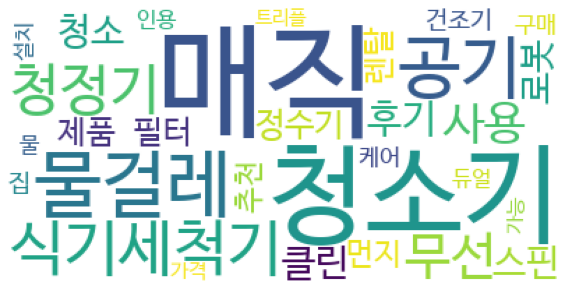

In [33]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 2) 형용사 핵심어를 단어 구름으로 표시하기

In [34]:
from wordcloud import WordCloud
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_adj)

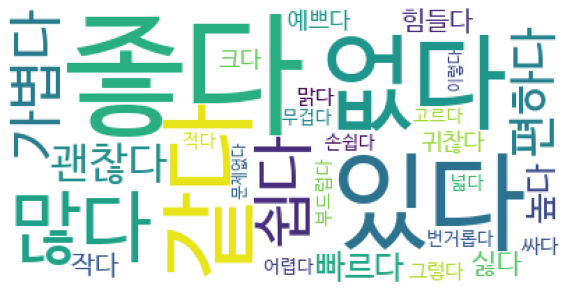

In [35]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

### 3) 단어 구름 바탕 그림 변경하기

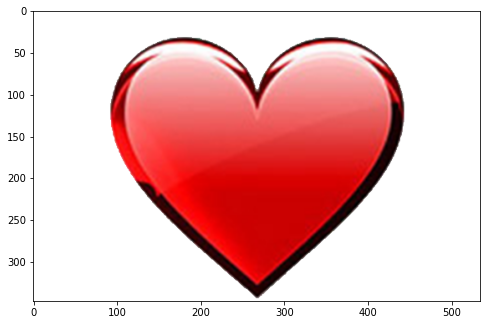

In [36]:
# 하트 그림파일 (heart.png) 같은 폴더에 미리 다운받아 놓을 것. 

from PIL import Image
import numpy as np
cloud_mask=np.array(Image.open('heart.png')) 
plt.figure(figsize=(8,8))
plt.imshow(cloud_mask,interpolation="bilinear")
plt.show()

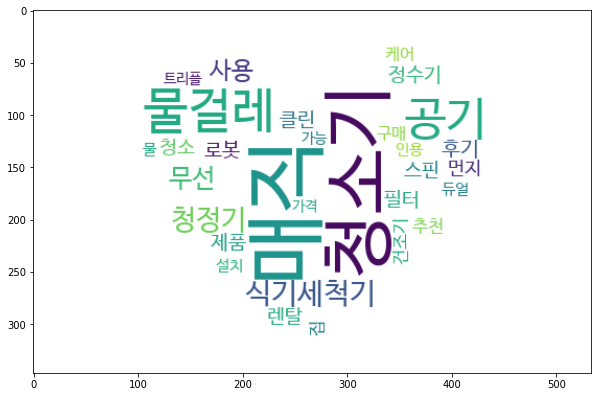

In [37]:
tm_wc = WordCloud(background_color="white", mask=cloud_mask, font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(tm_top_nouns)
plt.figure(figsize=(10,10))
plt.imshow(tm_wc,interpolation="bilinear")
plt.axis("on")
plt.show()

## 2-3. 단어빈도-역문서빈도(TF-IDF) 분석


블로그 내용에서 빈도가 높은 단어에 대해서 TF-IDF 값을 구하기 위해서 TfidfVectorizer 라이브러리를 import 한다. 그리고 추출한 50개의 명사가 블로그 내용에서 어떤 TF-IDF 값을 가지는지 배열 형태로 출력한다.

In [43]:
tm_top_nouns = list(tm_top_nouns.keys())
print(len(tm_top_nouns))

30


In [39]:
!pip install sklearn
import sklearn

You should consider upgrading via the 'C:\Users\realy\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


### 1) 상위 핵심어에 대한 TF-IDF 분석

TF-IDF 값에 대해서 테이블 형태로 살펴보기위해 DataFrame을 이용하여 출력한다.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vect = CountVectorizer()
document_term_matrix = vect.fit_transform(tm_top_nouns)

tm_tfidv = TfidfVectorizer().fit(tm_top_nouns)
tm_tfidv.transform(tm_posts).toarray()

tm_30_tfidf=pd.DataFrame(tm_tfidv.transform(tm_posts).toarray(), columns=vect.get_feature_names())
tm_30_tfidf[100:110]

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가격,가능,건조기,공기,구매,듀얼,렌탈,로봇,매직,먼지,...,제품,청소,청소기,청정기,추천,케어,클린,트리플,필터,후기
100,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.948683,0.0,0.316228,0.0,0.0,0.0,0.0,0.000000
101,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000
102,0.0,0.0,0.00000,0.0,0.707107,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.707107,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
103,0.0,0.0,0.57735,0.0,0.000000,0.0,0.0,0.57735,0.000000,0.0,...,0.0,0.0,0.577350,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
104,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
105,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.707107,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
106,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
107,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.500000,0.0,...,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
108,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.948683,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
109,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.00000,0.288675,0.0,...,0.0,0.0,0.000000,0.0,0.288675,0.0,0.0,0.0,0.0,0.288675


In [45]:
tm_30_tfidf.to_csv('./data/skm_blog_tfidf30.csv', encoding='utf-8-sig') # csv 저장

tfidf_xlsx = pd.ExcelWriter('./data/skm_blog_tfidf30.xlsx', engine='xlsxwriter') # xslx 파일로 저장 
tm_30_tfidf.to_excel(tfidf_xlsx, sheet_name='Sheet1') 
tfidf_xlsx.close()

In [46]:
# 상위 핵심어 30개 : 쇼핑 후기

import pandas as pd
shp30 = pd.read_csv("./data/skm_shp_tfidf30.csv", encoding='utf-8-sig')

print(shp30.columns.values)

['가격' '감사' '걸레' '걸레질' '구매' '구입' '대비' '디자인' '마음' '만족' '무선' '물걸레' '바닥' '배송'
 '사용' '상품' '선물' '소음' '스핀' '엄마' '제품' '청소' '청소기' '추천' '편리' '포장' '하나' '허리']


In [47]:
# 상위 핵심어 30개 : 블로그

import pandas as pd
blog30 = pd.read_csv("./data/skm_blog_tfidf30.csv", encoding='utf-8-sig')

print(blog30.columns.values)

['Unnamed: 0' '가격' '가능' '건조기' '공기' '구매' '듀얼' '렌탈' '로봇' '매직' '먼지' '무선'
 '물걸레' '사용' '설치' '스핀' '식기세척기' '인용' '정수기' '제품' '청소' '청소기' '청정기' '추천' '케어'
 '클린' '트리플' '필터' '후기']


### 2) 관심있는 단어를 직접 지정하여 TF-IDF 구하기

In [48]:
custom_vocab = ['가격', '청소기', '물걸레', '무선', '구매' ,'스핀', '추천' ,'제품' ,'청소' ,'로봇' 
                ,'필터' ,'케어' ,'선물', '소음' ,'편리']
print(custom_vocab)

['가격', '청소기', '물걸레', '무선', '구매', '스핀', '추천', '제품', '청소', '로봇', '필터', '케어', '선물', '소음', '편리']


In [49]:
vect = CountVectorizer()
custom_term_matrix = vect.fit_transform(custom_vocab)

custom_tm_tfidv = TfidfVectorizer().fit(custom_vocab)
custom_tm_tfidv.transform(tm_posts).toarray()

custom_tm_tfidf=pd.DataFrame(custom_tm_tfidv.transform(tm_posts).toarray(), columns=vect.get_feature_names())
custom_tm_tfidf[100:110]

C:\Users\realy\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가격,구매,로봇,무선,물걸레,선물,소음,스핀,제품,청소,청소기,추천,케어,편리,필터
100,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.948683,0.316228,0.0,0.0,0.0
101,0.0,0.000000,0.000000,0.00000,0.707107,0.0,0.0,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0
102,0.0,0.707107,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0
103,0.0,0.000000,0.707107,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0
104,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
105,0.0,0.000000,0.000000,0.00000,0.707107,0.0,0.0,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0
106,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0
107,0.0,0.000000,0.000000,0.57735,0.577350,0.0,0.0,0.0,0.0,0.0,0.577350,0.000000,0.0,0.0,0.0
108,0.0,0.000000,0.000000,0.00000,0.316228,0.0,0.0,0.0,0.0,0.0,0.948683,0.000000,0.0,0.0,0.0
109,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0


In [51]:
custom_tm_tfidf.to_csv('./data/skm_blog_tfidf_15.csv', encoding='utf-8-sig') # csv 저장

custom_tfidf_xlsx = pd.ExcelWriter('./data/skm_blog_tfidf_15.xlsx', engine='xlsxwriter') # xslx 파일로 저장 
custom_tm_tfidf.to_excel(custom_tfidf_xlsx, sheet_name='Sheet1') 
custom_tfidf_xlsx.close()

### 3) TF-IDF에 따른 T-test

In [3]:
import pandas as pd

blog = pd.read_csv("./data/skm_blog_tfidf_15.csv", encoding='utf-8-sig')
shp = pd.read_csv("./data/skm_shoping_tfidf_15.csv", encoding='utf-8-sig')

In [11]:
import numpy as np
from scipy import stats

In [17]:
t_stat, p_val = stats.ttest_ind(blog, shp)

print("t_test = " + str(t_stat) + "\n" + "p_val = " + str(p_val))

t_test = [-16.65204007   0.66679302   0.4057029    9.28167424  11.16416275
   5.1029968   -1.10129101  -1.05773501  -1.676082    -1.73807597
  -2.478377    36.54390793   9.21371943   3.50539611  -0.47622414
   6.69748161]
p_val = [2.00082693e-057 5.05003146e-001 6.85016655e-001 5.40910235e-020
 6.77907700e-028 3.75381033e-007 2.70940242e-001 2.90340343e-001
 9.39228967e-002 8.23951282e-002 1.33034660e-002 1.18465137e-211
 9.88078384e-020 4.68852406e-004 6.33981523e-001 2.95256838e-011]


In [ ]:
4,5,6,12,13,14,16

,Unnamed: 0,가격,구매,로봇,무선,물걸레,선물,소음,스핀,제품,청소,청소기,추천,케어,편리,필터
0,0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.000000,0.0,0.0
1,1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.447214,0.894427,0.0,0.000000,0.0,0.0
2,2,0.0,0.0,0.000000,0.780869,0.0,0.0,0.0,0.0,0.0,0.000000,0.624695,0.0,0.000000,0.0,0.0
3,3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0
4,4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,554,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.707107,0.0,0.0
555,555,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0
556,556,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0
557,557,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0
